# Objectives:
- Create a simple deep neural network
- Tune the hyperparameters

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

print("Impoerted modules")

2022-10-21 11:57:56.669388: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-21 11:57:56.743225: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-21 11:57:56.746382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-21 11:57:56.746389: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

Impoerted modules


In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

train_df = train_df.reindex(np.random.permutation(train_df.index))

In [3]:
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean) / train_df_std

test_df_mean = test_df.mean()
test_df_std = test_df.std()
test_df_norm = (test_df - test_df_mean) / test_df_std

print("Normalized the values")

Normalized the values


In [4]:
feature_columns = []

resolution_in_zs = 0.3 #3/10 of a standard deviation

latitude_as_a_numeric_column = tf.feature_column.numeric_column('latitude')
latitude_boundaries = list(np.arange(int(min(train_df_norm['latitude'])),
                                    int(max(train_df_norm['latitude'])),
                                    resolution_in_zs))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column,
                                              latitude_boundaries)

longitude_as_a_numeric_column = tf.feature_column.numeric_column('longitude')
longitude_boundaries = list(np.arange(int(min(train_df_norm['longitude'])),
                                     int(max(train_df_norm['longitude'])),
                                     resolution_in_zs))

longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column,
                                               longitude_boundaries)


latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

median_income = tf.feature_column.numeric_column('median_income')
feature_columns.append(median_income)

population = tf.feature_column.numeric_column('population')
feature_columns.append(population)

#convert the list of feature into a layer
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [20]:
def plot_the_loss_curve(epochs, mse):
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    
    plt.plot(epochs, mse, label='loss')
    plt.legend()
    plt.ylim([mse.min()*0.95, mse.max()*1.03])
    plt.show()
    

#Normal
def create_model(my_learning_rate, feature_layer):
    model = tf.keras.models.Sequential()
    model.add(feature_layer)
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

#DNN Implemented
def create_model_NN(my_learning_rate, feature_layer):
    
    model = tf.keras.models.Sequential()
    
    model.add(feature_layer)
    
    #hidden layer 01 with 20 nodes
    model.add(tf.keras.layers.Dense(units=10, 
                                   activation='relu',
                                   name='Hidden1'))
    #hidden layer 02 with 12 nodes
    model.add(tf.keras.layers.Dense(units=6, 
                                   activation='relu',
                                   name='Hidden2'))
    
    model.add(tf.keras.layers.Dense(units=1,
                                    name='Output'))
                                    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.MeanSquaredError()])
    
    return model

#Normal
def train_model(model, dataset, epochs, label_name, batch_size):
    
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                       epochs=epochs, shuffle=True)
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["mean_squared_error"]
    
    return epochs, rmse

# print("Defined functions")

#
def train_model_NN(model, dataset, epochs, label_name, batch_size=None):
    
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                       epochs=epochs, shuffle=True)
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["mean_squared_error"]
    
    return epochs, rmse

print("Defined functions")                              

Defined functions


Epoch 1/20
17/17 [==============================] - 0s 937us/step - loss: 0.8627 - mean_squared_error: 0.8627
Epoch 2/20
17/17 [==============================] - 0s 973us/step - loss: 0.5896 - mean_squared_error: 0.5896
Epoch 3/20
17/17 [==============================] - 0s 939us/step - loss: 0.4563 - mean_squared_error: 0.4563
Epoch 4/20
17/17 [==============================] - 0s 935us/step - loss: 0.3922 - mean_squared_error: 0.3922
Epoch 5/20
17/17 [==============================] - 0s 924us/step - loss: 0.3687 - mean_squared_error: 0.3687
Epoch 6/20
17/17 [==============================] - 0s 921us/step - loss: 0.3620 - mean_squared_error: 0.3620
Epoch 7/20
17/17 [==============================] - 0s 910us/step - loss: 0.3610 - mean_squared_error: 0.3610
Epoch 8/20
17/17 [==============================] - 0s 855us/step - loss: 0.3602 - mean_squared_error: 0.3602
Epoch 9/20
17/17 [==============================] - 0s 887us/step - loss: 0.3600 - mean_squared_error: 0.3600
Epoch 10/2

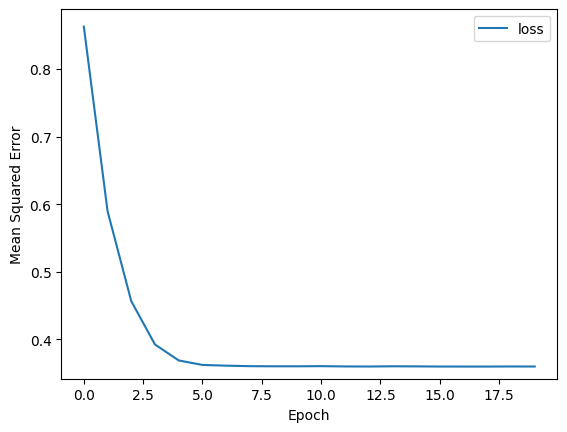


 Evaluate the linear regression model against the test set
3/3 [==============================] - 0s 1ms/step - loss: 0.3951 - mean_squared_error: 0.3951


[0.39509233832359314, 0.39509233832359314]

In [21]:
learning_rate = 0.01
epochs = 20
batch_size = 1000
label_name = "median_house_value"

my_model = create_model(learning_rate, my_feature_layer)

epochs, rmse = train_model(my_model, train_df_norm, epochs, label_name, batch_size)
plot_the_loss_curve(epochs, rmse)

test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name))
print("\n Evaluate the linear regression model against the test set")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

## With DNN

Epoch 1/20
17/17 [==============================] - 0s 1ms/step - loss: 0.5334 - mean_squared_error: 0.5334
Epoch 2/20
17/17 [==============================] - 0s 1ms/step - loss: 0.3585 - mean_squared_error: 0.3585
Epoch 3/20
17/17 [==============================] - 0s 1ms/step - loss: 0.3502 - mean_squared_error: 0.3502
Epoch 4/20
17/17 [==============================] - 0s 1ms/step - loss: 0.3472 - mean_squared_error: 0.3472
Epoch 5/20
17/17 [==============================] - 0s 1ms/step - loss: 0.3454 - mean_squared_error: 0.3454
Epoch 6/20
17/17 [==============================] - 0s 1ms/step - loss: 0.3434 - mean_squared_error: 0.3434
Epoch 7/20
17/17 [==============================] - 0s 1ms/step - loss: 0.3403 - mean_squared_error: 0.3403
Epoch 8/20
17/17 [==============================] - 0s 1ms/step - loss: 0.3403 - mean_squared_error: 0.3403
Epoch 9/20
17/17 [==============================] - 0s 1ms/step - loss: 0.3361 - mean_squared_error: 0.3361
Epoch 10/20
17/17 [=========

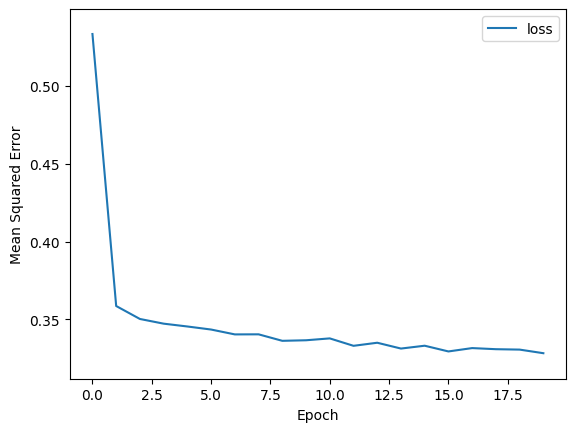


 Evaluate the linear regression model against the test set
3/3 [==============================] - 0s 2ms/step - loss: 0.3677 - mean_squared_error: 0.3677


[0.3676835894584656, 0.3676835894584656]

In [22]:
learning_rate = 0.01
epochs = 20
batch_size = 1000
label_name = "median_house_value"

my_model = create_model_NN(learning_rate, my_feature_layer)

epochs, rmse = train_model_NN(my_model, train_df_norm, epochs, label_name, batch_size)
plot_the_loss_curve(epochs, rmse)

test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name))
print("\n Evaluate the linear regression model against the test set")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

##### The loss of the deep neural network model was consistently lower than that of the linear regression model

## With L2 regularization

Epoch 1/140
17/17 [==============================] - 0s 1ms/step - loss: 1.9239 - mean_squared_error: 0.8597
Epoch 2/140
17/17 [==============================] - 0s 1ms/step - loss: 0.8455 - mean_squared_error: 0.5429
Epoch 3/140
17/17 [==============================] - 0s 1ms/step - loss: 0.5783 - mean_squared_error: 0.4090
Epoch 4/140
17/17 [==============================] - 0s 1ms/step - loss: 0.5030 - mean_squared_error: 0.3825
Epoch 5/140
17/17 [==============================] - 0s 1ms/step - loss: 0.4708 - mean_squared_error: 0.3749
Epoch 6/140
17/17 [==============================] - 0s 1ms/step - loss: 0.4567 - mean_squared_error: 0.3711
Epoch 7/140
17/17 [==============================] - 0s 1ms/step - loss: 0.4479 - mean_squared_error: 0.3709
Epoch 8/140
17/17 [==============================] - 0s 1ms/step - loss: 0.4411 - mean_squared_error: 0.3701
Epoch 9/140
17/17 [==============================] - 0s 1ms/step - loss: 0.4370 - mean_squared_error: 0.3684
Epoch 10/140
17/17 

17/17 [==============================] - 0s 1ms/step - loss: 0.3889 - mean_squared_error: 0.3483
Epoch 62/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3868 - mean_squared_error: 0.3473
Epoch 63/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3888 - mean_squared_error: 0.3493
Epoch 64/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3870 - mean_squared_error: 0.3473
Epoch 65/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3874 - mean_squared_error: 0.3484
Epoch 66/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3857 - mean_squared_error: 0.3456
Epoch 67/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3857 - mean_squared_error: 0.3477
Epoch 68/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3844 - mean_squared_error: 0.3452
Epoch 69/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3847 - mean_squared_error: 0.3452
Epoch 70/140
17/17 [===

17/17 [==============================] - 0s 1ms/step - loss: 0.3736 - mean_squared_error: 0.3416
Epoch 136/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3725 - mean_squared_error: 0.3409
Epoch 137/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3733 - mean_squared_error: 0.3418
Epoch 138/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3771 - mean_squared_error: 0.3456
Epoch 139/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3731 - mean_squared_error: 0.3419
Epoch 140/140
17/17 [==============================] - 0s 1ms/step - loss: 0.3737 - mean_squared_error: 0.3426


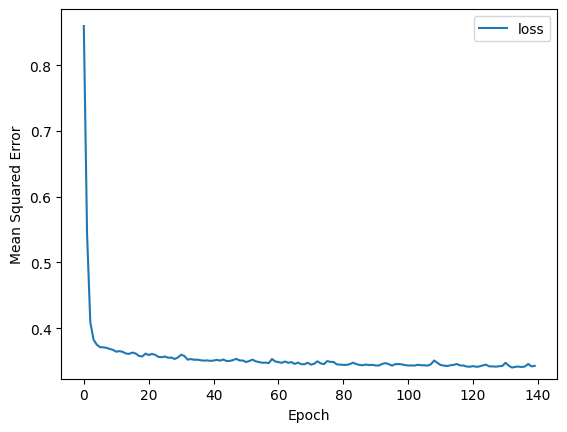


 Evaluate the new model against the test set:
3/3 [==============================] - 0s 2ms/step - loss: 0.4101 - mean_squared_error: 0.3794


[0.41008901596069336, 0.3793794810771942]

In [27]:
def create_model(my_learning_rate, my_feature_layer):
    model = None
    model = tf.keras.models.Sequential()
    model.add(my_feature_layer)
    
    model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu',
                                  kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                  name='Hidden1'))
    
    model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                  name='Hidden2'))
    model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])
    return model     

# Call the new create_model function and the other (unchanged) functions.

# The following variables are the hyperparameters.
learning_rate = 0.007
epochs = 140
batch_size = 1000

label_name = "median_house_value"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, train_df_norm, epochs, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

test_features = {name:np.array(value) for name, value in test_df_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size) 